Tancredi Bosi, 0001121897, tancredi.bosi@studio.unibo.it

## Import useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

random_state = 42

## Load the data and print some stats

I decided to load only the "train.csv" file because I think it is better to have the ground truth for the evaluation of the results and therefore have a rmse for training and testing (I splitted the "train.csv" in train set and test set, having the file a consistent number of samples.).

- Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
- Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
- Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
- Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
- Engine Type: Understand the engine specifications, shedding light on performance and efficiency.
- Transmission: Determine the transmission type, whether automatic, manual, or another variant.
- Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
- Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
- Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
- Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.

In [2]:
data = pd.read_csv('train.csv')

In [3]:
print(f"Training set: \t{data.shape[0]} rows \t{data.shape[1]} columns")

Training set: 	188533 rows 	13 columns


In [4]:
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


Thorugh the print of the first 5 rows of the dataset we can already gather some useful information. <br>
- "id" column can be dropped as it refers only to the index of the car.
- "brand" and "model" columns seem to have a lot of different unique values.
- "engine" column has useful and different information abridged in one string.
- "ext_col" and "int_col" columns are the colors of the cars and they may be not so useful.
- "price" column, the target feature, seems to have a wide range of values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
data.describe(include='all')

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,188533.000000,188533,188533,188533.000000,188533.000000,183450,188533,188533,188533,188533,186081,167114,1.885330e+05
unique,NaN,57,1897,NaN,NaN,7,1117,52,319,156,2,1,NaN
top,NaN,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
freq,NaN,23088,2945,NaN,NaN,165940,3462,49904,48658,107674,144514,167114,NaN
mean,94266.000000,NaN,NaN,2015.829998,65705.295174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.387802e+04
std,54424.933488,NaN,NaN,5.660967,49798.158076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.881952e+04
min,0.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,47133.000000,NaN,NaN,2013.000000,24115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04
50%,94266.000000,NaN,NaN,2017.000000,57785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.082500e+04
75%,141399.000000,NaN,NaN,2020.000000,95400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000e+04


With the data description we can see that the analysis done before are valid and that there are some missing values. Thus, the missing values have to be dealt with and also the many unique values in some columns.

In [7]:
print(data.isnull().sum())

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


## Plot the data

Visualize the data to have a better understanding of the distribution and outliers

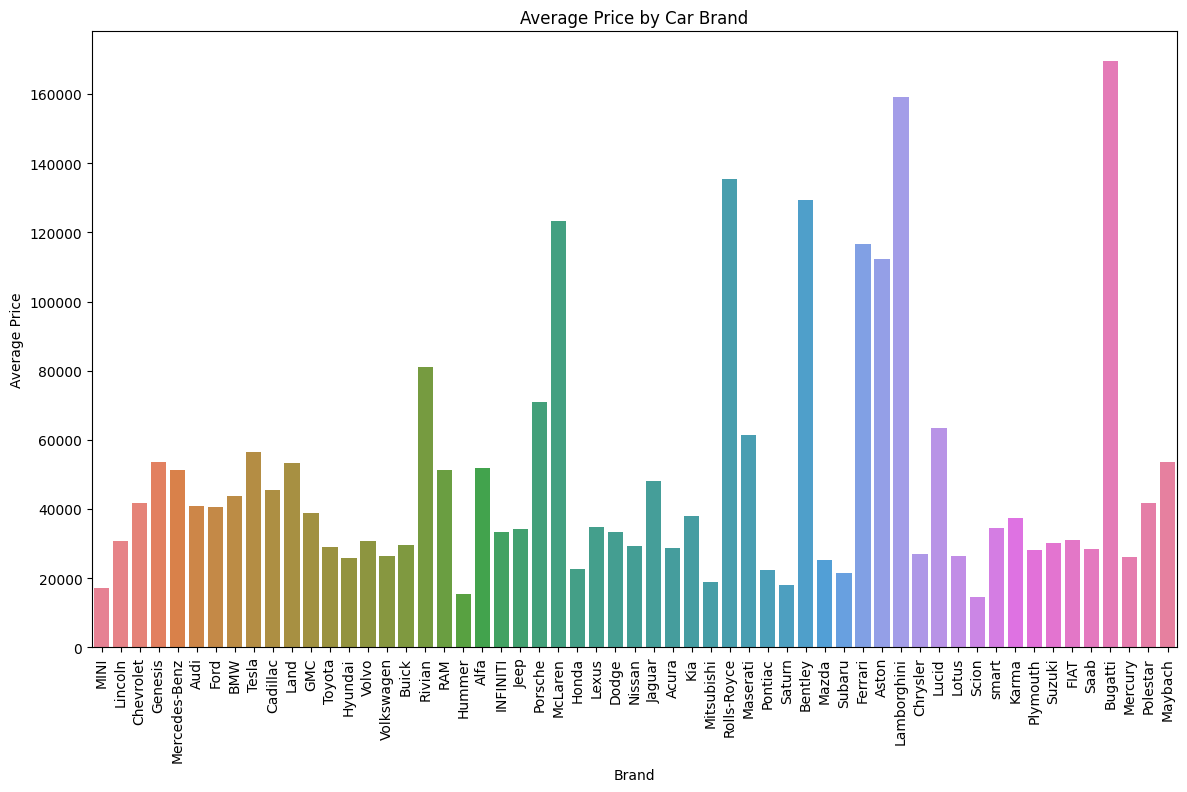

In [8]:
plt.figure(figsize=(14, 8))
sns.barplot(x='brand', y='price', data=data, errorbar=None, hue='brand', legend=False)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  
plt.show()

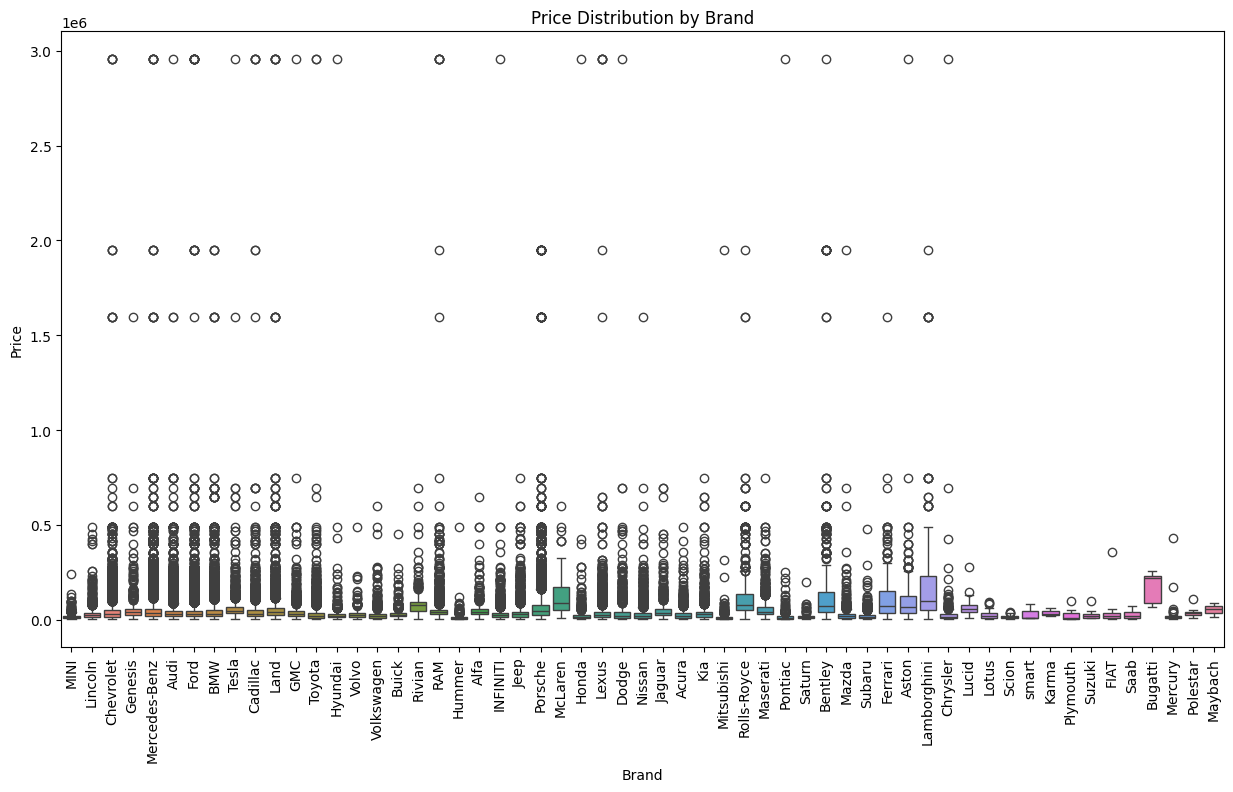

In [9]:
# Box plot for price by car brand
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='brand', y='price', hue='brand', legend=False)
plt.xticks(rotation=90)
plt.title("Price Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()

Visualizing the boxplot of the price with reference to the brand, we can see that there are outliers, and also that some of them seem to be errors. There are three lines (2.9e6, 1.6e6 and 1.9e6) that are all isolated and at the same value, so they are likely errors. To be sure about that let investigate the "Chevrolet" brand. It is known that it's a normal brand, not of luxury, but it can have some car models with a price value consistently above the average. We can analyze that by printing the 5 rows of Chevrolet brand that have higher price.

In [10]:
chevrolet_cars = data[data['brand'] == 'Chevrolet']
chevrolet_cars.sort_values(by='price', ascending=False).head(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
118167,118167,Chevrolet,Corvette Base,2007,54323,Gasoline,430.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,A/T,White,Red,None reported,Yes,2954083
85611,85611,Chevrolet,Silverado 1500 Custom Trail Boss,2022,5072,Gasoline,5.3L V8 16V GDI OHV,Automatic,White,Jet Black,None reported,NaN,2954083
66224,66224,Chevrolet,Corvette Base,2005,23133,Gasoline,400.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gold,Beige,None reported,Yes,2954083
46159,46159,Chevrolet,Tahoe LT,2018,83858,E85 Flex Fuel,5.3L V8 16V MPFI OHV Flexible Fuel,6-Speed Automatic,Silver,Jet Black,None reported,NaN,2954083
31429,31429,Chevrolet,Corvette Base,2002,15443,Gasoline,400.0HP 6.0L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Beige,None reported,Yes,1950995


These cars have a very high price and making some searchs over the internet, it appers clearly that the price reported is an error: the Silverado 2022 model can be found at about 50k €, not 2954k.<br>

So, in the data processing phase these data entries errors should be dealt.

But, before doing the data processing, let's have a look to the other features.

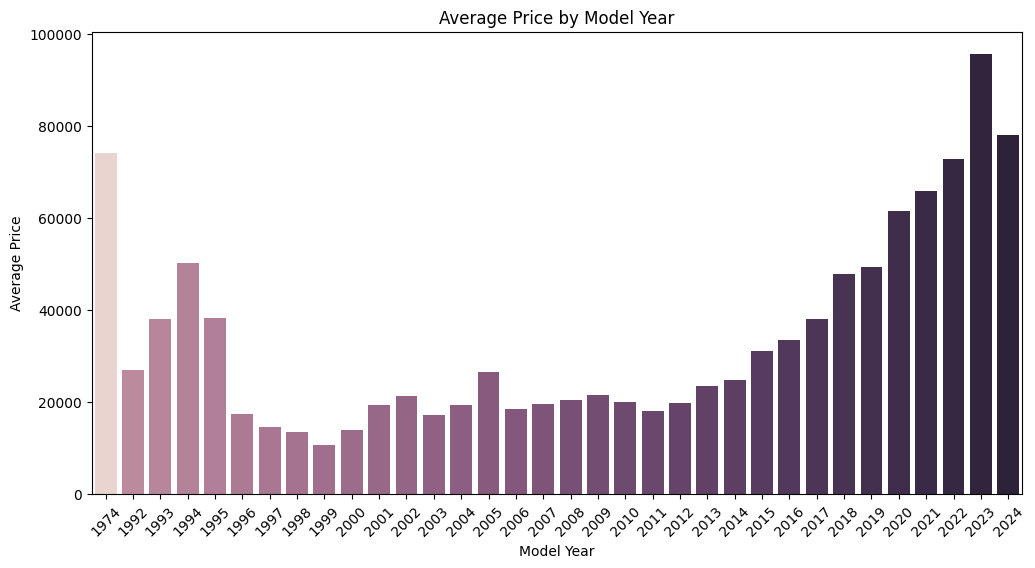

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='price', data=data, errorbar=None, hue='model_year', legend=False)
plt.title('Average Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Although the price is altered due to the previous considerations, from the "Average Price by Model Year" barplot we can see that the "model_year" feature is an important feature: new cars and pretty old cars (maybe because out of production and difficult to find) have significantly higher prices.

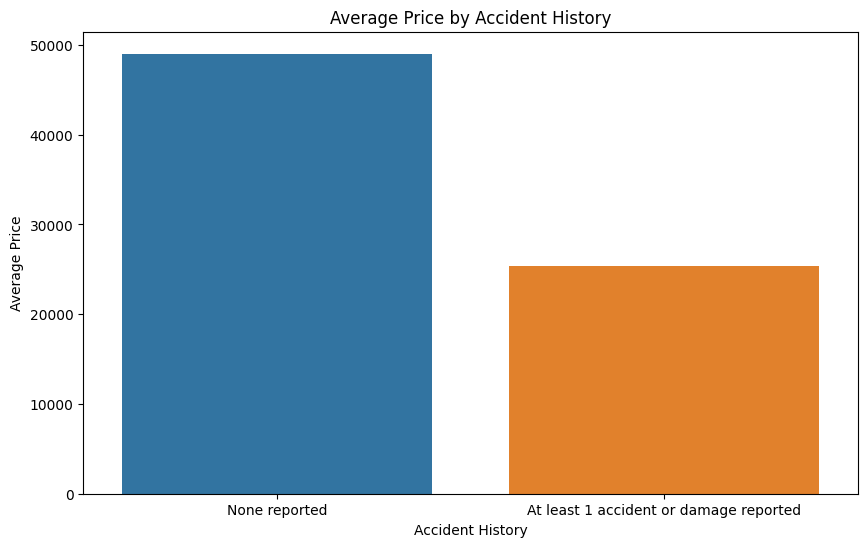

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=data, errorbar=None, hue='accident', legend=False)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.show()

Also the "accident" column seems to be important in the definition of the price: cars with at least 1 accident have lower average price, and this is pretty plausible according to the fact that cars with an accident history can have some damages.

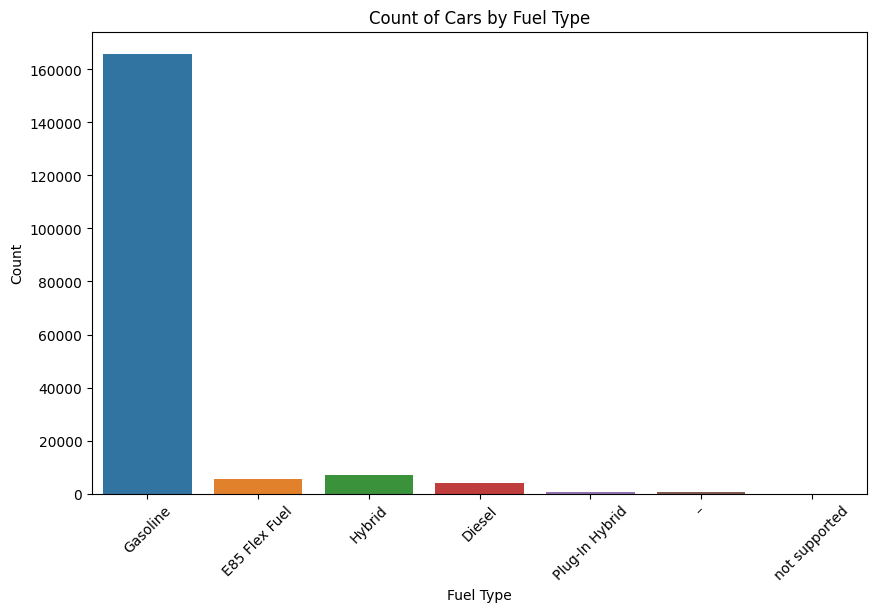

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=data, hue='fuel_type', legend=False)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the plot of the count of "fuel_type" we can evaluate that more than 90% of the cars have "Gasoline" fuel and there is a "-" value that almost surely represent the "Electric" fuel type. In fact, in the Dataset Card on kaggle, under the explanation of the "fuel_type" feature, the "Electric" value is mentioned and it can definitely represented by the "-" value.

## Data Processing

### Deal with outliers

Below I remove the outliers with the IQR method within each brand, in order to remove outliers considering the brand in analysis (a Chevrolet that has 200k as price is an outlier, a Bugatti is not)

In [14]:
# Remove the outliers
def remove_outliers(df, column, threshold=1.5):
    def remove_outliers_from_group(group):
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        return group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]
    
    return df.groupby('brand').apply(remove_outliers_from_group).reset_index(drop=True)

# Apply the function to remove outliers from the 'price' column
data = remove_outliers(data, 'price')


/var/folders/_g/7s4z636d67z67rlmmnqgx5mm0000gn/T/ipykernel_47678/3797912126.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('brand').apply(remove_outliers_from_group).reset_index(drop=True)


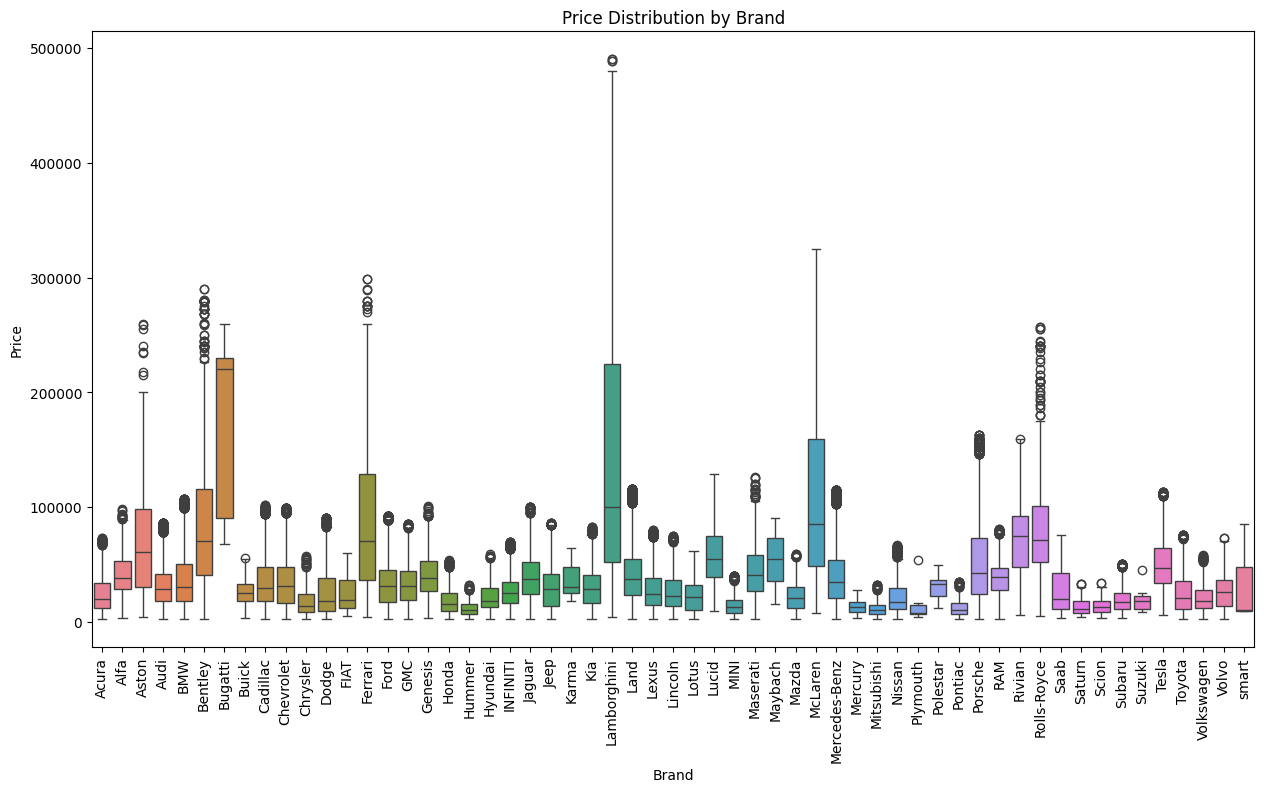

In [15]:
# Box plot for price by car brand
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='brand', y='price', hue='brand', legend=False)
plt.xticks(rotation=90)
plt.title("Price Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()

In [16]:
# Print the top 5 Lamborghini rows by price
top_5_lamborghini = data[data['brand'] == 'Lamborghini'].nlargest(5, 'price')
top_5_lamborghini

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
99775,160977,Lamborghini,Urus Base,2021,4283,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Rosso Mars Metallic,Nero Ade,None reported,NaN,489995
99827,172563,Lamborghini,Murcielago Base,2006,10000,Gasoline,571.0HP 6.2L 12 Cylinder Engine Gasoline Fuel,M/T,Red,Black,None reported,Yes,489995
99881,187262,Lamborghini,Gallardo LP570-4 Superleggera,2014,816,Gasoline,5.2L V10 40V GDI DOHC,6-Speed Manual,White,Nero Ade,None reported,NaN,489000
99536,104212,Lamborghini,GTO Base,2005,1795,Gasoline,6.5L V12 48V MPFI DOHC,7-Speed Manual,Balloon White,Nero Ade,NaN,NaN,488880
99159,14865,Lamborghini,Huracan EVO Base,2022,2750,Gasoline,5.2L V10 40V PDI DOHC,7-Speed Automatic with Auto-Shift,Kemora Gray Metallic,Beige,None reported,NaN,479995


### Feature extraction

In [17]:
def vehicle_age(df):
    current_year = 2024

    df['vehicle_age'] = current_year - df['model_year']
    df = df.drop(columns=['model_year'])

    return df

def engine_info(engine_total):
    HP_str = re.search(r'(\d+\.?\d*)HP', engine_total)
    size_str = re.search(r'(\d+\.?\d*)L', engine_total)
    cylinder_str = re.search(r'(\d+) Cylinder', engine_total)

    HP = float(HP_str.group(1)) if HP_str else None
    size = float(size_str.group(1)) if size_str else None
    cylinder = int(cylinder_str.group(1)) if cylinder_str else None

    return HP, size, cylinder

def process_transmission_data(data):
    # Create a DataFrame of unique transmissions
    data_transmission = pd.DataFrame(data['transmission'].unique().tolist(), columns=['Transmission'])
    
    # Feature 1: Extract the number of gears
    data_transmission['speed'] = data_transmission['Transmission'].apply(lambda x: re.search(r'\d+', x).group() if re.search(r'\d+', x) else None)
    
    # Feature 2: Identify transmission type (automatic, manual, CVT)
    data_transmission['transmission_type'] = data_transmission['Transmission'].apply(
        lambda x: 'Automatic' if 'A/T' in x or 'Automatic' in x or 'CVT' in x 
                  else 'Manual' if 'M/T' in x or 'Manual' in x 
                  else 'Other'
    )
    
    # Concatenate the new features with the original data
    data = pd.concat([data, data_transmission[['speed', 'transmission_type']]], axis=1)

    # Drop the "transmission" column
    data = data.drop(columns=['transmission'])
    
    return data

def extract_brand_features(df):

    luxury_brands = ['Bugatti', 'Lamborghini', 'McLaren', 'Ferrari', 'Bentley', 'Rolls-Royce', 'Aston', 'Rivian', 'Lucid', 'Maybach', 'Porsche']
    economy_brands = ['Toyota', 'Acura', 'FIAT', 'Lotus', 'Mazda', 'Hyundai', 'Nissan', 'Volkswagen', 'Suzuki', 'Subaru', 'Honda', 'Chrysler', 'Plymouth', 'MINI', 'Scion', 'Saturn', 'Mercury', 'Pontiac', 'Hummer', 'Mitsubishi']
    df['luxury_brand'] = df['brand'].apply(lambda x: 2 if x in luxury_brands else 0 if x in economy_brands else 1)

    '''
    average_price_per_brand = df.groupby('brand')['price'].mean().reset_index()
    overall_average_price = df['price'].mean()

    # Create brand tier categories (luxury, premium, economy)
    luxury_brands = average_price_per_brand[average_price_per_brand['price'] > (1.5 *overall_average_price)]['brand'].tolist()
    premium_brands = average_price_per_brand[(average_price_per_brand['price'] > overall_average_price) & (average_price_per_brand['price'] <= (1.5 * overall_average_price))]['brand'].tolist()
    economy_brands = average_price_per_brand[(average_price_per_brand['price'] <= overall_average_price) & (average_price_per_brand['price'] > (1/2 * overall_average_price))]['brand'].tolist()
    
    df['luxury_brand'] = df['brand'].apply(lambda x: 3 if x in luxury_brands else 2 if x in premium_brands else 1 if x in economy_brands else 0)
    '''
    df = df.drop(columns=['brand'])
    
    return df

Through 3 function I extracted some features:
- the 'vehicle_age' from the 'model_year'
- 'speed' and 'transmission_type' from the 'transmission' column
- the type of the 'brand', divided in luxury, economy and other in the middle

In [18]:
# Add a column "vehicle_age" and drop the column "model_year"
data = vehicle_age(data)

# Add the columns "HP", "engine_size" and "cylinders" and drop the column "engine"
data[['HP', 'engine_size', 'cylinders']] = data['engine'].apply(lambda x: pd.Series(engine_info(x)))

data = data.drop(columns=['engine'])

# Add the columns "speed" and "transmission_type" and drop the column "transmission"
data = process_transmission_data(data)

# Add the columns "luxury_brand", "premium_brand" and "economy_brand" and drop the column "brand"
data = extract_brand_features(data)

In [19]:
data.head()

,id,model,milage,fuel_type,ext_col,int_col,accident,clean_title,price,vehicle_age,HP,engine_size,cylinders,speed,transmission_type,luxury_brand
0,111,ILX Premium Package,16113,Gasoline,Ebony Twilight Metallic,Ebony,None reported,NaN,29998,3,NaN,2.4,NaN,6,Automatic,0
1,122,TLX,60854,Gasoline,Platinum White Pearl,Ebony,At least 1 accident or damage reported,NaN,19425,4,NaN,NaN,NaN,None,Automatic,0
2,164,RDX w/A-Spec Package,39517,Gasoline,Gray,Black,NaN,NaN,29645,1,NaN,NaN,NaN,None,Automatic,0
3,270,TL Type S,123500,Gasoline,Beige,Beige,None reported,Yes,12800,19,290.0,3.5,6.0,6,Manual,0
4,282,TLX,3389,Gasoline,Platinum White Pearl,Black,None reported,NaN,40798,4,NaN,NaN,NaN,None,Other,0


### Deal with missing values

Fill all the missing values with 'Unknown' and than deal with it

In [20]:
# Replace '-' with 'Electric' in the "fuel_type" because electric is mentioned in the "Data card" of the dataset and it is not in the values, so it must be the '-'
print('Fuel types pre processing:', data['fuel_type'].unique())
data['fuel_type'] = data['fuel_type'].fillna('Unknown')
data['fuel_type'] = data['fuel_type'].replace('–', 'Electric')
print('Fuel types post processing:', data['fuel_type'].unique())

print()

# Accidents
print('Accidents pre processing:', data['accident'].unique())
data['accident'] = data['accident'].fillna('Unknown')
print('Accidents post processing:', data['accident'].unique())

print()

# Clean title
print('Clean title pre processing:', data['clean_title'].unique())
data['clean_title'] = data['clean_title'].fillna('Unknown')
print('Clean title post processing:', data['clean_title'].unique())

print()

# HP
print('HP pre processing:', data['HP'].unique())
data['HP'] = data['HP'].fillna(0)
print('HP processing', data['HP'].unique())

print()

# Engine size
print('Engine size pre processing:', data['engine_size'].unique())
data['engine_size'] = data['engine_size'].fillna(0)
print('Engine size processing', data['engine_size'].unique())

print()

# Cylinders
print('Cylinders pre processing:', data['cylinders'].unique())
data['cylinders'] = data['cylinders'].fillna(0)
print('Cylinders processing', data['cylinders'].unique())

print()

# Speed
print('Speed pre processing:', data['speed'].unique())
data['speed'] = data['speed'].fillna('0')
print('Speed post processing', data['speed'].unique())

print()

# Transmission type
print('Transmission type pre processing:', data['transmission_type'].unique())
data['transmission_type'] = data['transmission_type'].fillna('Unknown')
print('Transmission type post processing', data['transmission_type'].unique())

Fuel types pre processing: ['Gasoline' 'E85 Flex Fuel' '–' 'Hybrid' nan 'Diesel' 'Plug-In Hybrid'
 'not supported']
Fuel types post processing: ['Gasoline' 'E85 Flex Fuel' 'Electric' 'Hybrid' 'Unknown' 'Diesel'
 'Plug-In Hybrid' 'not supported']

Accidents pre processing: ['None reported' 'At least 1 accident or damage reported' nan]
Accidents post processing: ['None reported' 'At least 1 accident or damage reported' 'Unknown']

Clean title pre processing: [nan 'Yes']
Clean title post processing: ['Unknown' 'Yes']

HP pre processing: [  nan  290.  150.  280.  270.  355.  206.  201.  200.  300.  400.  140.
  258.  272.  305.  268.  260.  295.  239.  444.  279.  160.  302.  310.
  286.  321.  306.  291.  220.  151.  210.  265.  420.  560.  320.  240.
  147.  285.  180.  250.  275.  245.  252.  158.  263.  190.  153.  563.
  136.  182.  215.  349.  316.  155.  390.  303.  261.  284.  106.  386.
  271.  835.  505.  424.  255.  503.  380.  710.  582.  523.  490.  430.
  340.  605.  715.  54

In [21]:
print(data.isnull().sum())

id                   0
model                0
milage               0
fuel_type            0
ext_col              0
int_col              0
accident             0
clean_title          0
price                0
vehicle_age          0
HP                   0
engine_size          0
cylinders            0
speed                0
transmission_type    0
luxury_brand         0
dtype: int64


### Drop columns

Drop:
- 'id' beacuse it is not useful as said before.
- 'clean_title'
- 'ext_col' and 'int_col' because they plausibily do not change the price so much, maybe in some rare cases, but it is not worth it.
- 'model' beacause there are a lot of different values for each brand and the encoding would create a sparse matrix.
- 'fuel_type' because almost all are 'Gasoline' and it does not contribute per the evaluation.

In [22]:
# drop columns that I think that are not useful (the color of the car can be changed and usually it is a cheap optional)
data = data.drop(columns=['id', 'ext_col', 'int_col'])

In [23]:
data.head()

,model,milage,fuel_type,accident,clean_title,price,vehicle_age,HP,engine_size,cylinders,speed,transmission_type,luxury_brand
0,ILX Premium Package,16113,Gasoline,None reported,Unknown,29998,3,0.0,2.4,0.0,6,Automatic,0
1,TLX,60854,Gasoline,At least 1 accident or damage reported,Unknown,19425,4,0.0,0.0,0.0,0,Automatic,0
2,RDX w/A-Spec Package,39517,Gasoline,Unknown,Unknown,29645,1,0.0,0.0,0.0,0,Automatic,0
3,TL Type S,123500,Gasoline,None reported,Yes,12800,19,290.0,3.5,6.0,6,Manual,0
4,TLX,3389,Gasoline,None reported,Unknown,40798,4,0.0,0.0,0.0,0,Other,0


In [24]:
def group_models(model_name):
    # Examples of grouping patterns
    if any(term in model_name.lower() for term in ['sport', 'gt', 'rs', 'amg']):
        return 'Sport'
    elif any(term in model_name.lower() for term in ['luxury', 'premium']):
        return 'Luxury'
    elif any(term in model_name.lower() for term in ['base', 'standard']):
        return 'Base'
    # Add more patterns as needed
    return 'Other'

data['model_category'] = data['model'].apply(group_models)

In [25]:
data = data.drop(columns=['model'])

In [26]:
data.head()

,milage,fuel_type,accident,clean_title,price,vehicle_age,HP,engine_size,cylinders,speed,transmission_type,luxury_brand,model_category
0,16113,Gasoline,None reported,Unknown,29998,3,0.0,2.4,0.0,6,Automatic,0,Luxury
1,60854,Gasoline,At least 1 accident or damage reported,Unknown,19425,4,0.0,0.0,0.0,0,Automatic,0,Other
2,39517,Gasoline,Unknown,Unknown,29645,1,0.0,0.0,0.0,0,Automatic,0,Other
3,123500,Gasoline,None reported,Yes,12800,19,290.0,3.5,6.0,6,Manual,0,Other
4,3389,Gasoline,None reported,Unknown,40798,4,0.0,0.0,0.0,0,Other,0,Other


### Scale some columns

Scale some numerical columns with RobustScaler() in order to have a better range for training.

In [27]:
columns_to_standardize = ['milage', 'vehicle_age', 'HP', 'engine_size']

scaler = RobustScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

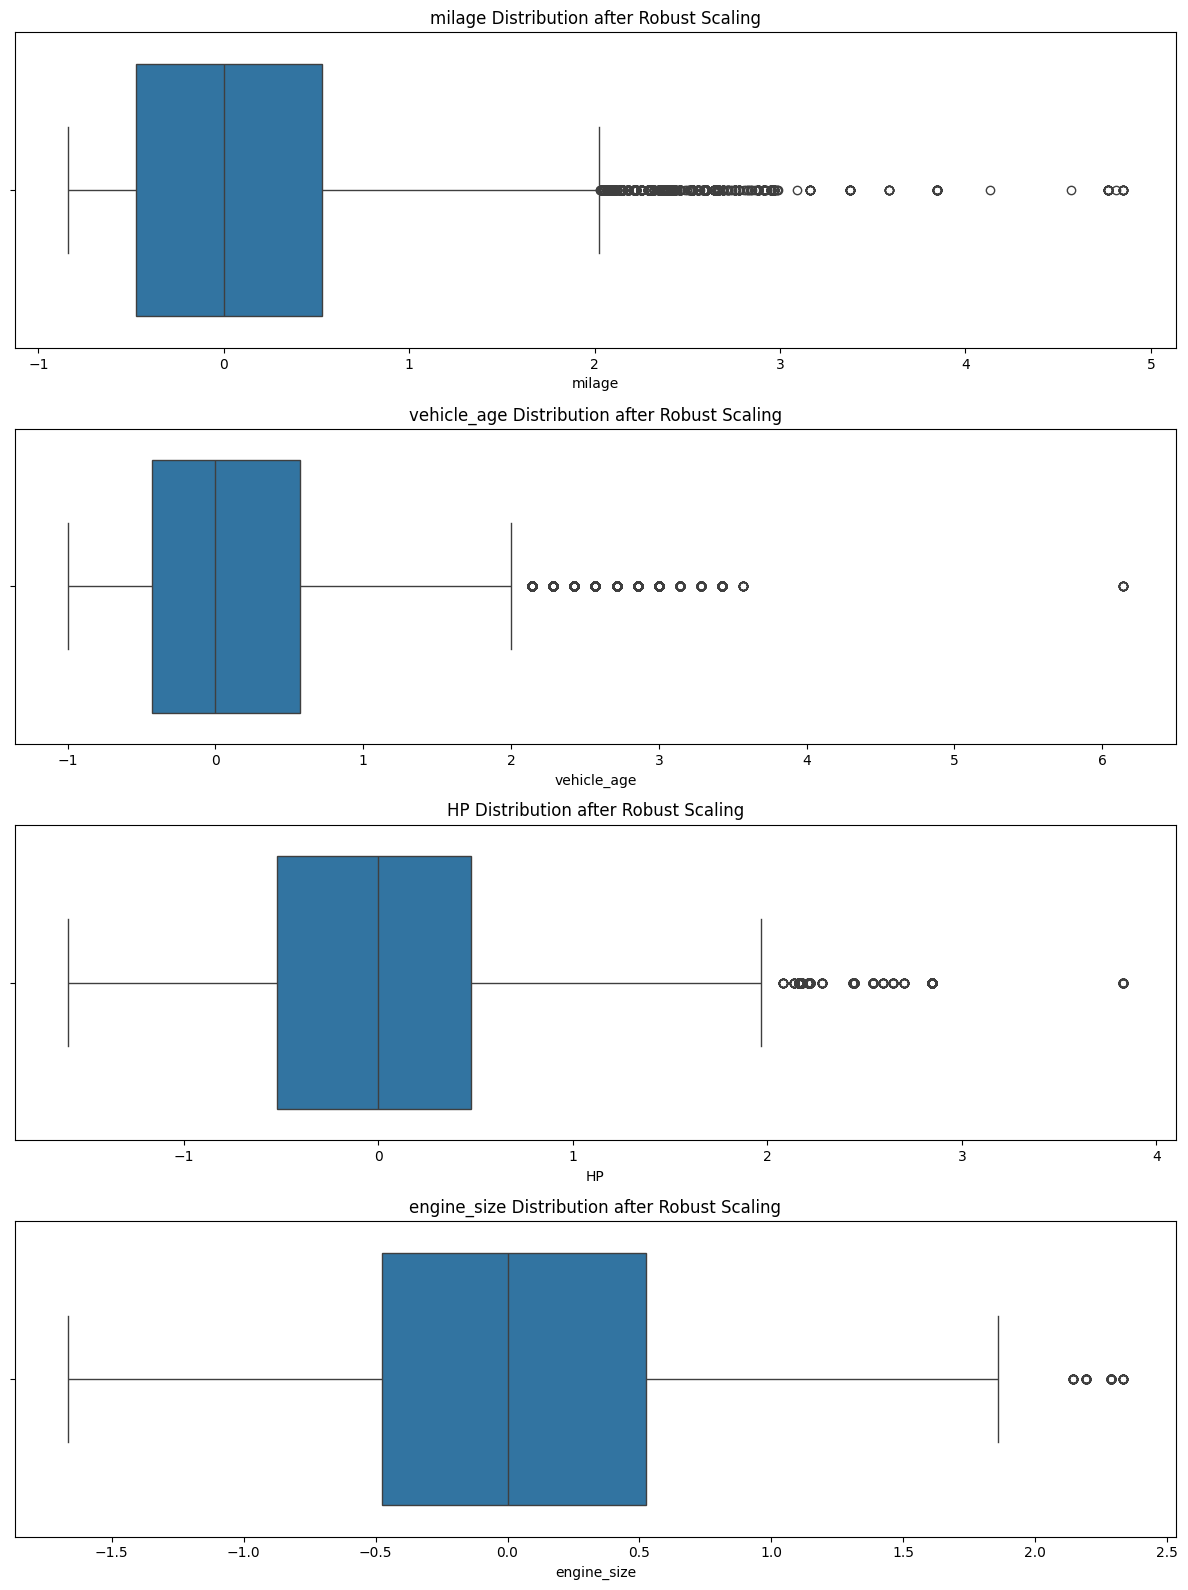

In [28]:
fig, axes = plt.subplots(len(columns_to_standardize), 1, figsize=(12, 4*len(columns_to_standardize)))

for i, column in enumerate(columns_to_standardize):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'{column} Distribution after Robust Scaling')

plt.tight_layout()
plt.show()

In [29]:
data.head()

,milage,fuel_type,accident,clean_title,price,vehicle_age,HP,engine_size,cylinders,speed,transmission_type,luxury_brand,model_category
0,-0.617136,Gasoline,None reported,Unknown,29998,-0.571429,-1.595745,-0.523810,0.0,6,Automatic,0,Luxury
1,0.012009,Gasoline,At least 1 accident or damage reported,Unknown,19425,-0.428571,-1.595745,-1.666667,0.0,0,Automatic,0,Other
2,-0.288030,Gasoline,Unknown,Unknown,29645,-0.857143,-1.595745,-1.666667,0.0,0,Automatic,0,Other
3,0.892932,Gasoline,None reported,Yes,12800,1.714286,-0.053191,0.000000,6.0,6,Manual,0,Other
4,-0.796060,Gasoline,None reported,Unknown,40798,-0.428571,-1.595745,-1.666667,0.0,0,Other,0,Other


### Encode the non-numerical features

In [30]:
# Encode the accident column as 1 if 'At least 1 accident or damage reported', else 0
data['accident'] = data['accident'].apply(lambda x: 1 if x=='At least 1 accident or damage reported' else 0)

In [31]:
# Transform the column 'speed' to numerical data, it was a column of strings before
data['speed'] = data['speed'].replace('Unknown', 0)
data['speed'] = pd.to_numeric(data['speed'])

In [32]:
# Encode the 'transmission_type' as 1 if it is 'Automatic', 0 if it is 'Manual' or else
data['transmission_type'] = data['transmission_type'].apply(lambda x: 1 if x=='Automatic' else 0)

In [33]:
# Encode the 'clean_title' as 1 if it is 'Yes', 0 otherwise
data['clean_title'] = data['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

In [34]:
# Keep only fewer differentiations of 'fuel_type'
data['fuel_type'] = data['fuel_type'].apply(lambda x: 0 if x == 'Gasoline' 
                                                        else 1 if x =='Electric' 
                                                        else 2 if x == 'Diesel' 
                                                        else 3 if (x == 'Hybrid' or x == 'Plug-In Hybrid') 
                                                        else 4)

In [35]:
# Make One-Hot Encoding of the 'luxury_brand', 'fuel_type' and 'model_category'
categorical_columns = ['luxury_brand', 'fuel_type', 'model_category']

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data_encoded = data_encoded.replace({True: 1, False: 0})

/var/folders/_g/7s4z636d67z67rlmmnqgx5mm0000gn/T/ipykernel_47678/4209450308.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace({True: 1, False: 0})


In [36]:
data_encoded.head()

,milage,accident,clean_title,price,vehicle_age,HP,engine_size,cylinders,speed,transmission_type,luxury_brand_1,luxury_brand_2,fuel_type_1,fuel_type_2,fuel_type_3,fuel_type_4,model_category_Luxury,model_category_Other,model_category_Sport
0,-0.617136,0,0,29998,-0.571429,-1.595745,-0.523810,0.0,6,1,0,0,0,0,0,0,1,0,0
1,0.012009,1,0,19425,-0.428571,-1.595745,-1.666667,0.0,0,1,0,0,0,0,0,0,0,1,0
2,-0.288030,0,0,29645,-0.857143,-1.595745,-1.666667,0.0,0,1,0,0,0,0,0,0,0,1,0
3,0.892932,0,1,12800,1.714286,-0.053191,0.000000,6.0,6,0,0,0,0,0,0,0,0,1,0
4,-0.796060,0,0,40798,-0.428571,-1.595745,-1.666667,0.0,0,0,0,0,0,0,0,0,0,1,0


In [37]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178861 entries, 0 to 178860
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   milage                 178861 non-null  float64
 1   accident               178861 non-null  int64  
 2   clean_title            178861 non-null  int64  
 3   price                  178861 non-null  int64  
 4   vehicle_age            178861 non-null  float64
 5   HP                     178861 non-null  float64
 6   engine_size            178861 non-null  float64
 7   cylinders              178861 non-null  float64
 8   speed                  178861 non-null  int64  
 9   transmission_type      178861 non-null  int64  
 10  luxury_brand_1         178861 non-null  int64  
 11  luxury_brand_2         178861 non-null  int64  
 12  fuel_type_1            178861 non-null  int64  
 13  fuel_type_2            178861 non-null  int64  
 14  fuel_type_3            178861 non-nu

## Create X_train and y_train

Divide the data in 80% training set and 20% test set

In [39]:
X = data_encoded.drop(columns=['price'])
y = data_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

## Create, train and evaluate model

In [40]:
def plot_results(train_rmse, test_rmse, ytrain, ytest, ytrainpred, ytestpred):
    rmse_values = [train_rmse, test_rmse]
    labels = ['Train RMSE', 'Test RMSE']

    # Plot RMSE Comparison
    plt.figure(figsize=(8, 5))
    plt.bar(labels, rmse_values, color=['blue', 'orange'])
    plt.ylabel('RMSE')
    plt.title('RMSE Comparison')
    plt.show()

    # Plot Predictions vs True Values for Training and Testing sets separately
    # Determine the y-axis limits for training and test sets
    train_ylim = (min(min(ytrain), min(ytrainpred)), max(max(ytrain), max(ytrainpred)))
    test_ylim = (min(min(ytest), min(ytestpred)), max(max(ytest), max(ytestpred)))

    plt.figure(figsize=(14, 10))

    # 1. Training Set True Values
    plt.subplot(2, 2, 1)
    plt.plot(range(len(ytrain)), ytrain, 'o', color='blue', markersize=5, label='True Values')
    plt.xlabel('Element')
    plt.ylabel('Value')
    plt.title('Training Set: True Values')
    plt.ylim(train_ylim)  # Set y-axis limits for training
    plt.grid()
    plt.legend()

    # 2. Training Set Predicted Values
    plt.subplot(2, 2, 2)
    plt.plot(range(len(ytrainpred)), ytrainpred, 'o', color='red', markersize=5, label='Predicted Values')
    plt.xlabel('Element')
    plt.ylabel('Value')
    plt.title('Training Set: Predicted Values')
    plt.ylim(train_ylim)  # Set y-axis limits for training
    plt.grid()
    plt.legend()

    # 3. Test Set True Values
    plt.subplot(2, 2, 3)
    plt.plot(range(len(ytest)), ytest, 'o', color='blue', markersize=5, label='True Values')
    plt.xlabel('Element')
    plt.ylabel('Value')
    plt.title('Test Set: True Values')
    plt.ylim(test_ylim)  # Set y-axis limits for test
    plt.grid()
    plt.legend()

    # 4. Test Set Predicted Values
    plt.subplot(2, 2, 4)
    plt.plot(range(len(ytestpred)), ytestpred, 'o', color='red', markersize=5, label='Predicted Values')
    plt.xlabel('Element')
    plt.ylabel('Value')
    plt.title('Test Set: Predicted Values')
    plt.ylim(test_ylim)  # Set y-axis limits for test
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

In [41]:
def train_evaluate_model(model, model_name, X_train, X_test, y_train, y_test, results, has_feature_importance=False, is_grid_search=False):

    # Train model
    model.fit(X_train, y_train)

    if is_grid_search:
        print(f"Best parameters found: {model.best_params_}")
    
    # Make predictions
    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)
    
    # Calculate RMSE
    train_rmse = root_mean_squared_error(train_y_pred, y_train)
    test_rmse = root_mean_squared_error(test_y_pred, y_test)
    
    print(f'Train rmse {train_rmse}')
    print(f'Test rmse {test_rmse}')
    
    # Store results
    results.loc[len(results)] = [model_name, train_rmse, test_rmse]
    
    # Plot prediction results
    plot_results(train_rmse, test_rmse, y_train, y_test, train_y_pred, test_y_pred)
    
    # Plot feature importance if available
    if has_feature_importance:
        importance_values = model.feature_importances_ if hasattr(model, 'feature_importances_') else abs(model.coef_)
        importances = pd.DataFrame({
            'feature': X_train.columns,
            'importance': importance_values
        })
        importances = importances.sort_values('importance', ascending=False)
        
        plt.figure(figsize=(12,6))
        plt.bar(importances['feature'], importances['importance'])
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.title(f'Feature Importance from {model_name}')
        plt.tight_layout()
        plt.show()

In [42]:
# prepare a dataframe for the quality results
results = pd.DataFrame(columns=['Model','Train RMSE','Test RMSE'])

Train rmse 19192.26292188491
Test rmse 18877.630774308625


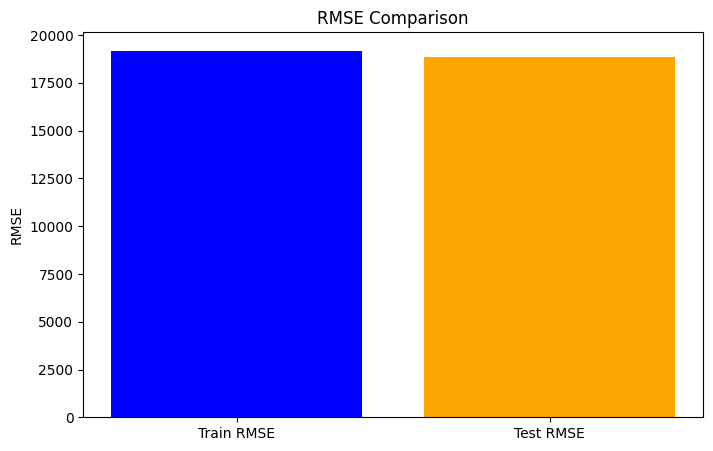

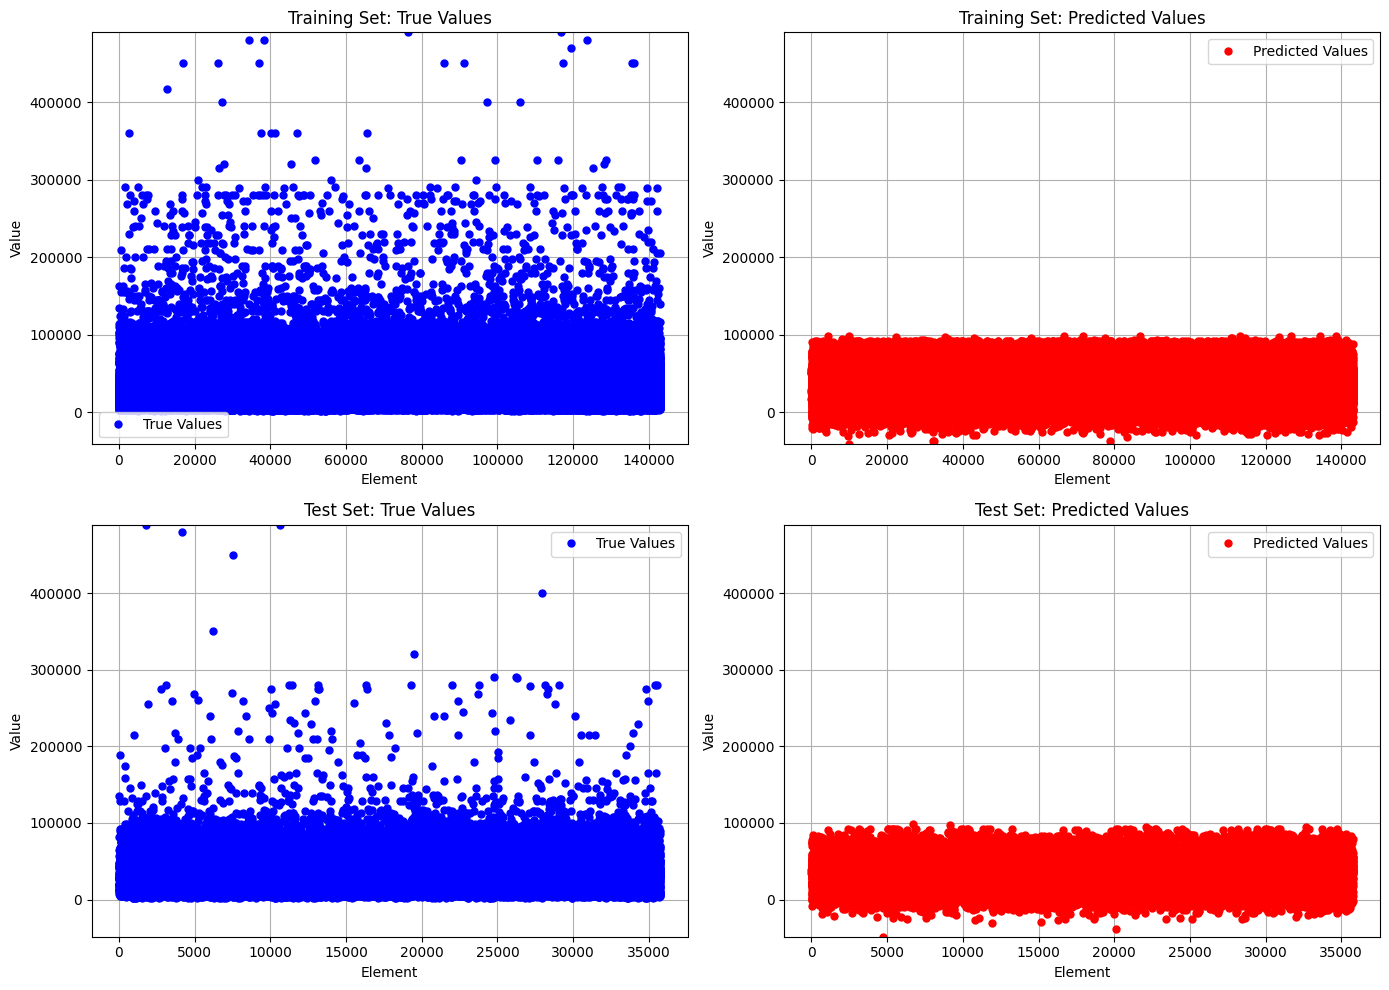

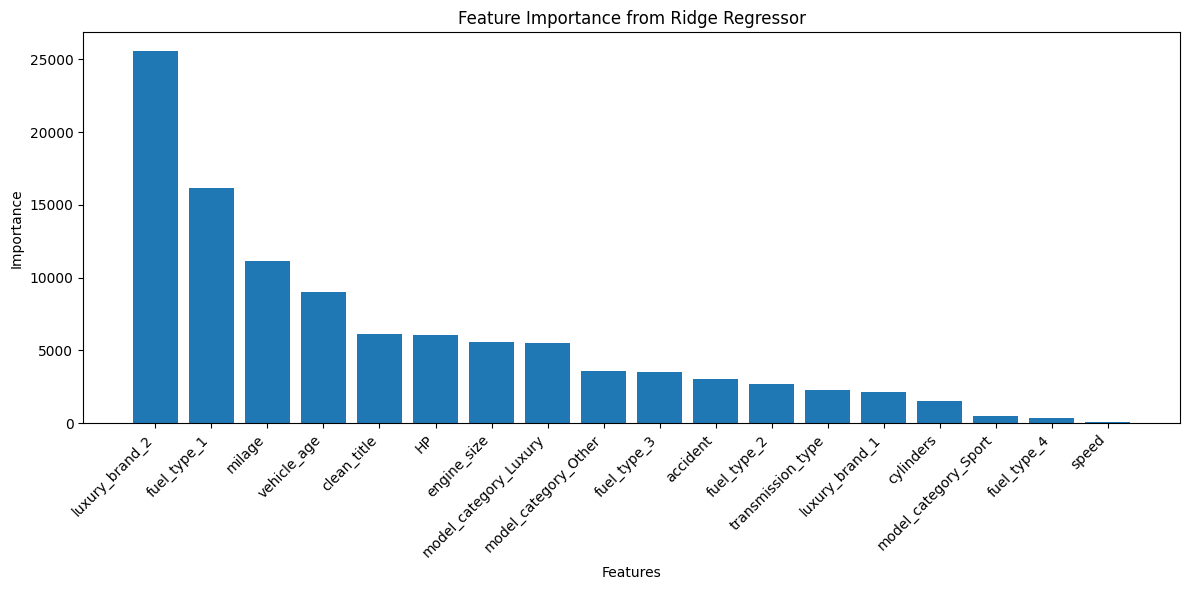

In [43]:
from sklearn.linear_model import Ridge

lr = Ridge()
train_evaluate_model(lr, 'Ridge Regressor', X_train, X_test, y_train, y_test, results, has_feature_importance=True)

Train rmse 8134.419781733904
Test rmse 17625.011145229026


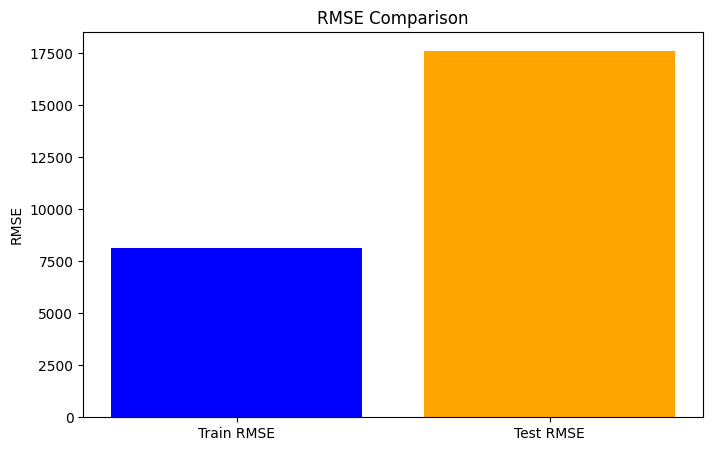

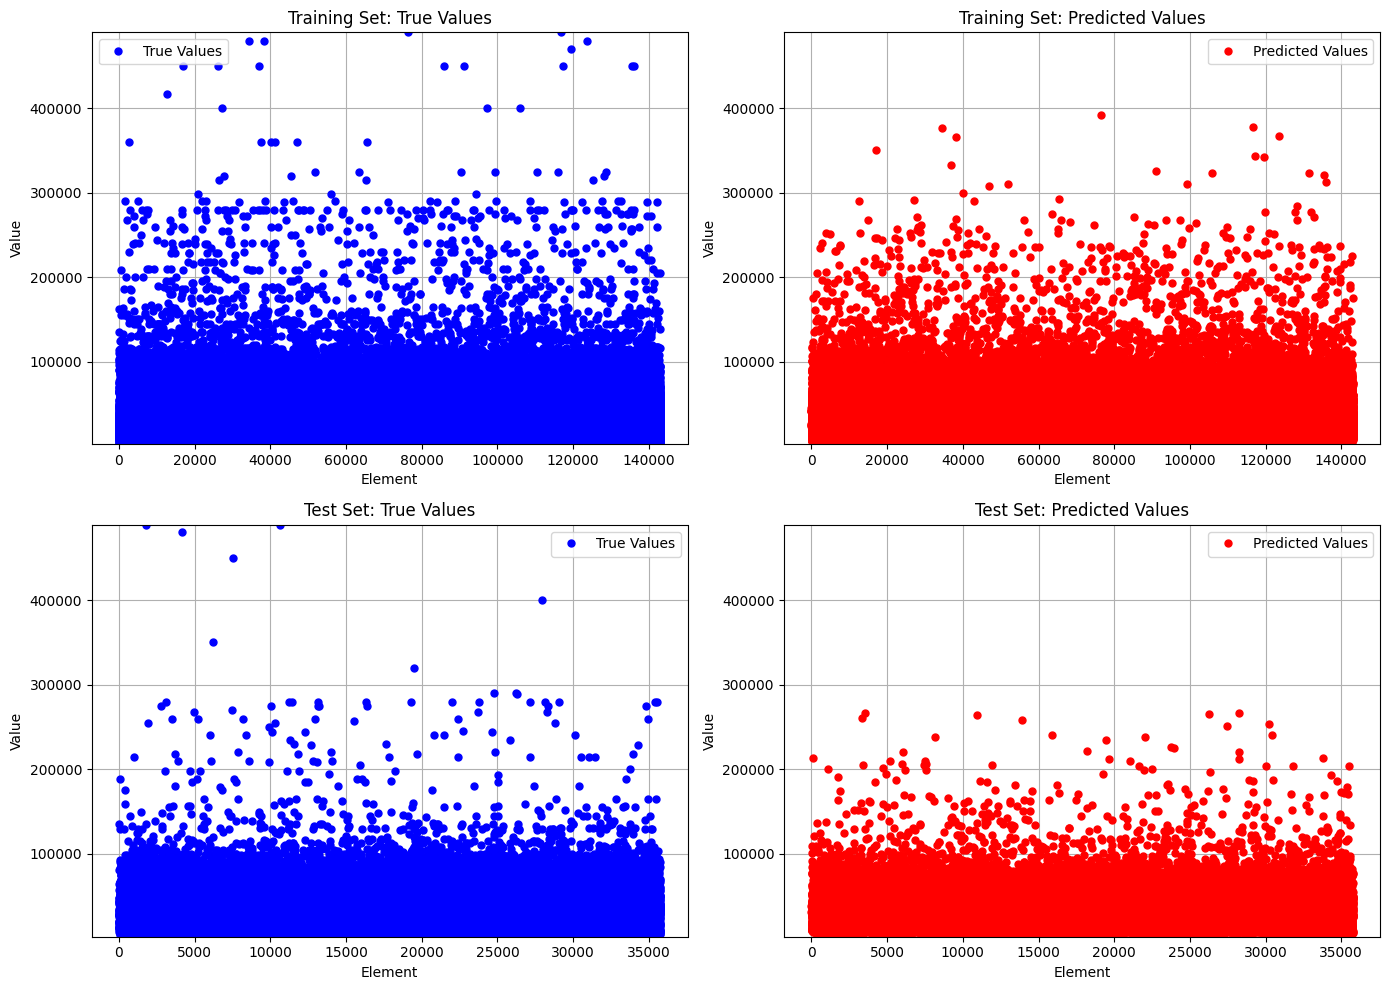

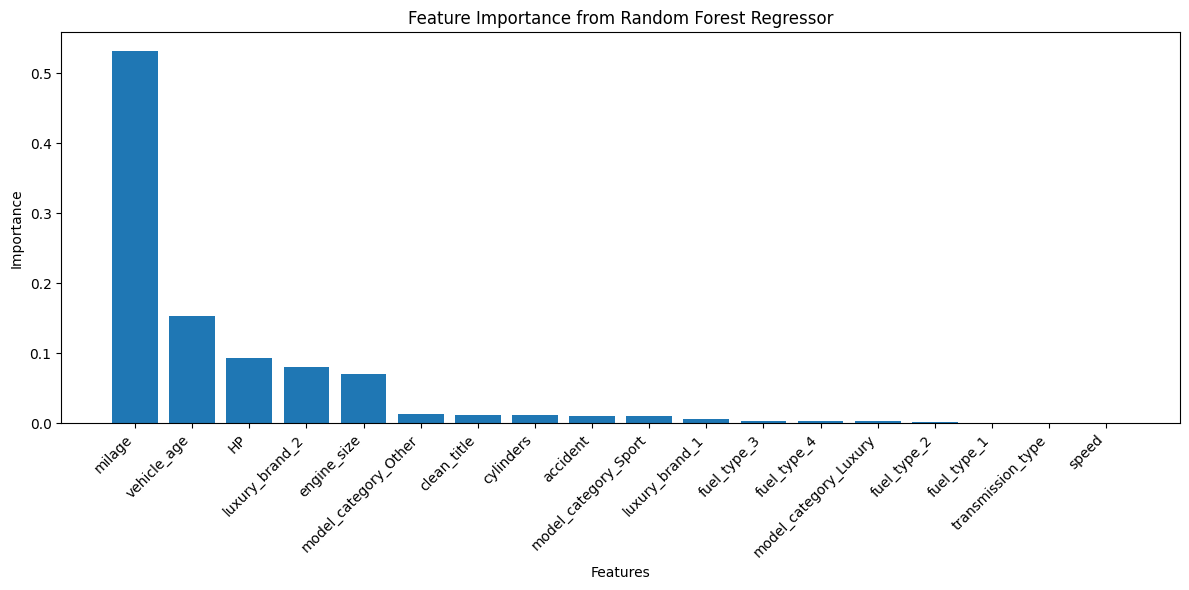

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=random_state)
train_evaluate_model(rf, 'Random Forest Regressor', X_train, X_test, y_train, y_test, results, has_feature_importance=True)

Train rmse 25040.001146342955
Test rmse 24719.35320634887


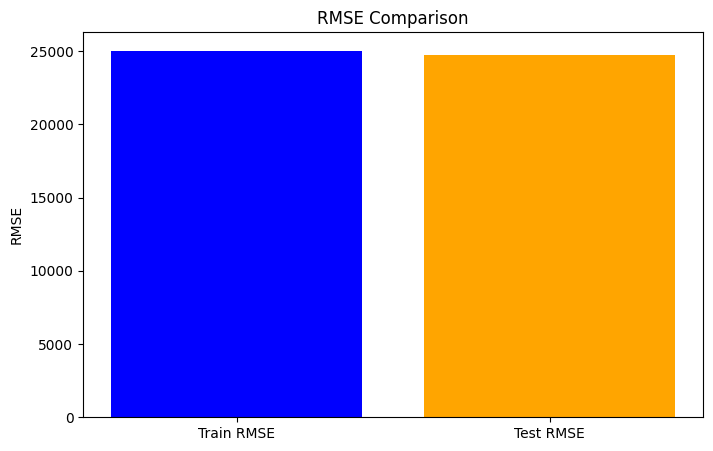

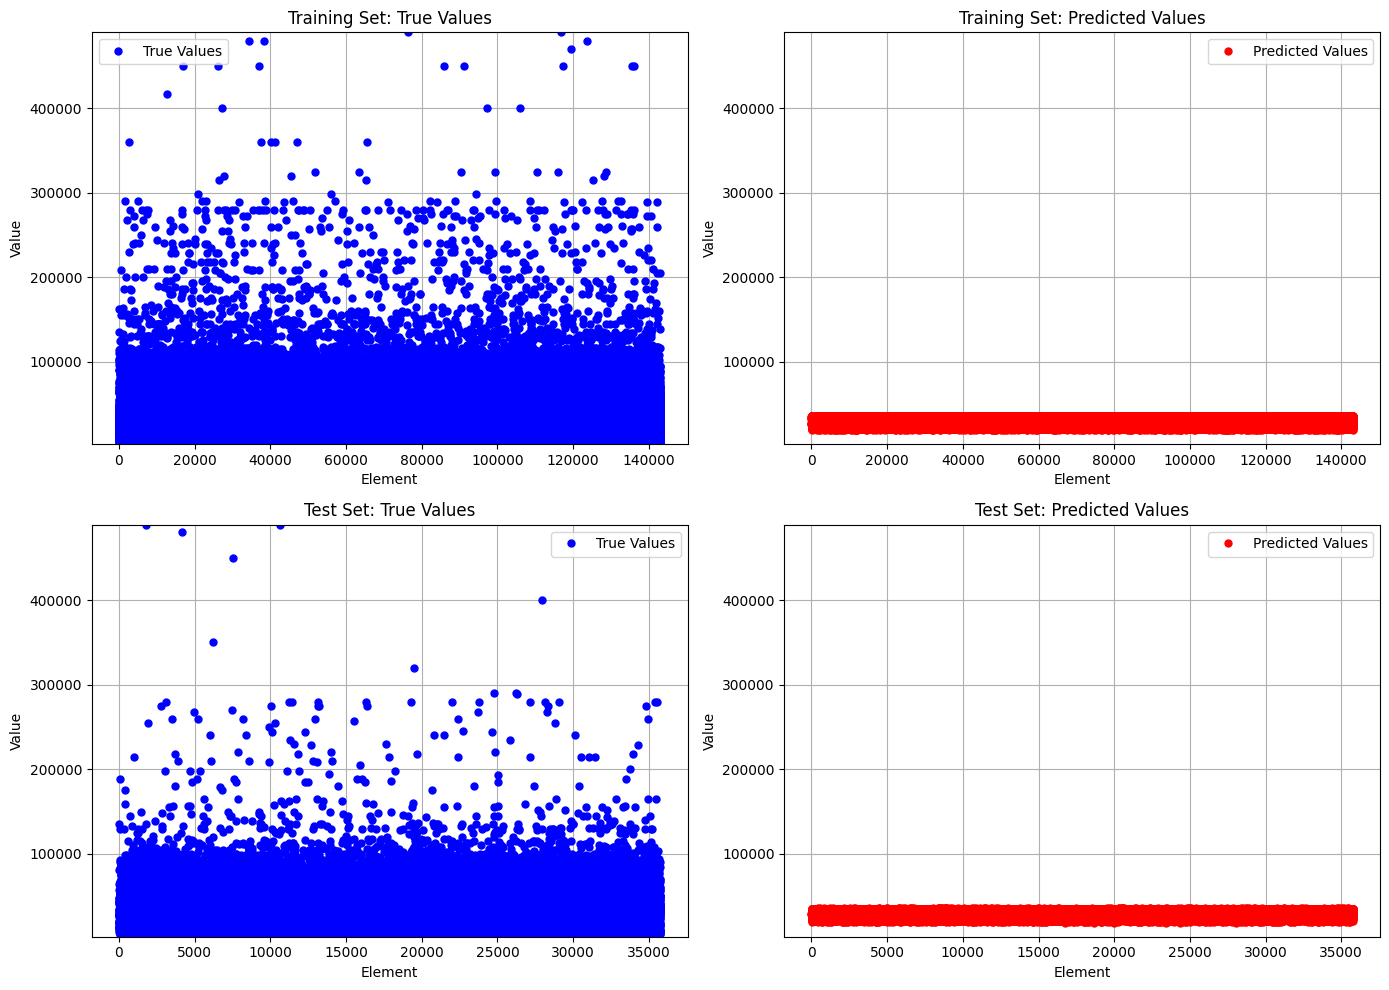

In [172]:
from sklearn.svm import SVR

svr = SVR()
train_evaluate_model(svr, 'SV Regressor', X_train, X_test, y_train, y_test, results, has_feature_importance=True)

Best parameters found: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}
Train rmse 15122.317450415274
Test rmse 16493.550305474662


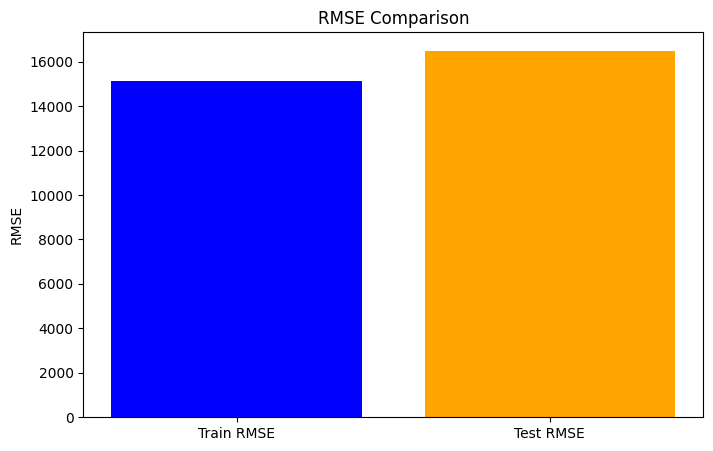

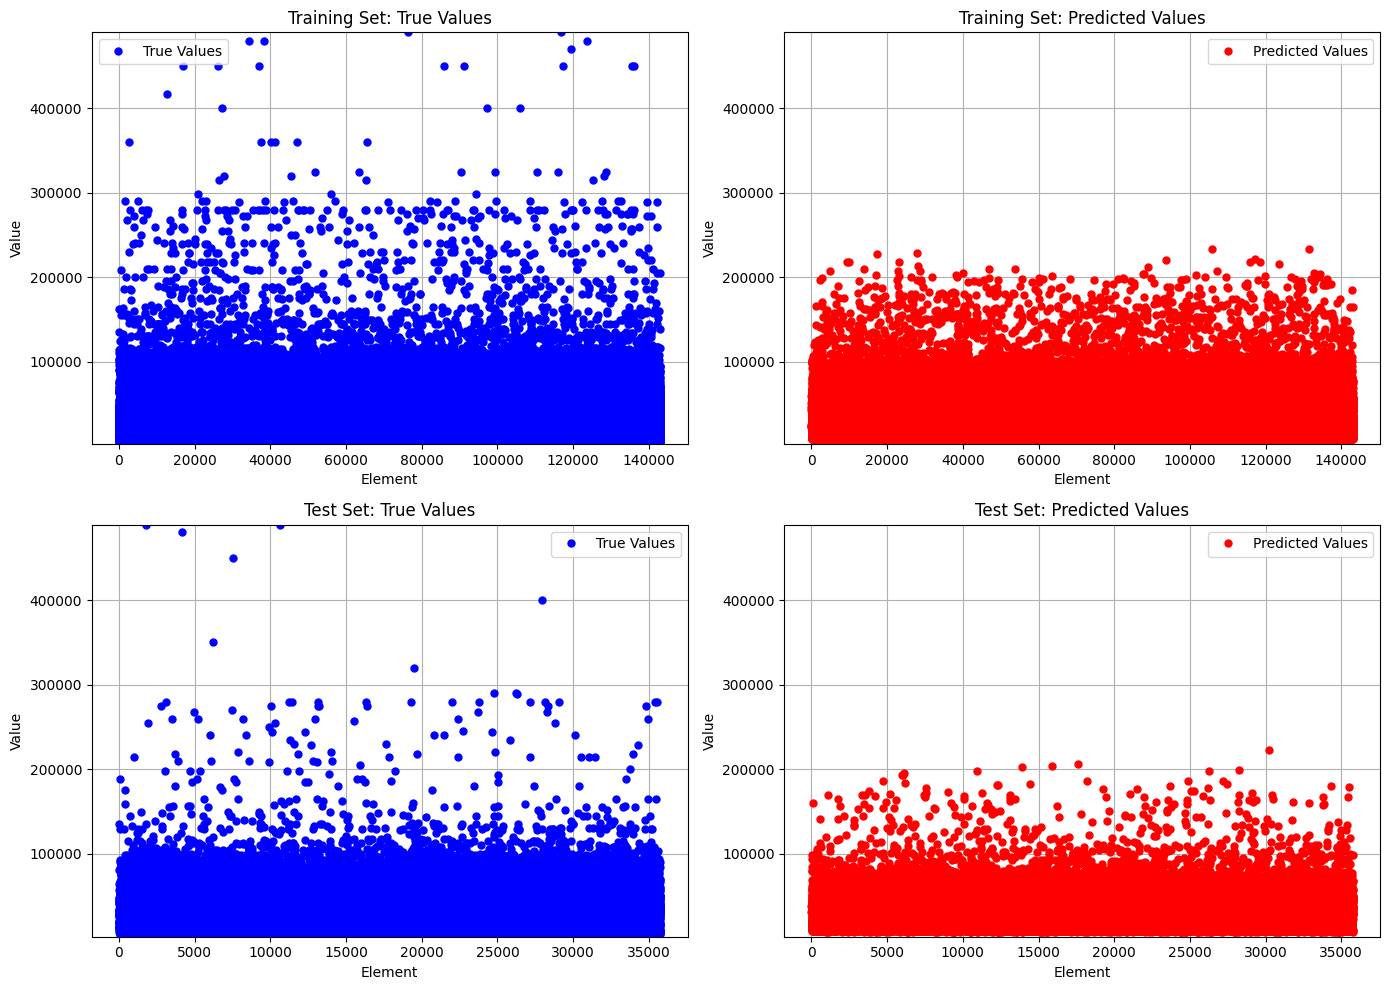

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_regr = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100],   # Number of trees in the forest
    'max_depth': [12, 13, 14],  # Maximum depth of the tree
    'min_samples_split': [10, 11, 12],  # Minimum number of samples required to split a node
    'min_samples_leaf': [4, 5],    # Minimum number of samples required at a leaf node       # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV with RandomForestRegressor and param_grid
grid_search = GridSearchCV(estimator=rf_regr, param_grid=param_grid,
                           cv=5, scoring='neg_root_mean_squared_error')

train_evaluate_model(grid_search, 'Random Forest Regressor GS', X_train, X_test, y_train, y_test, results, has_feature_importance=True, is_grid_search=True)

Train rmse 19941.286400888504
Test rmse 19990.2614383597


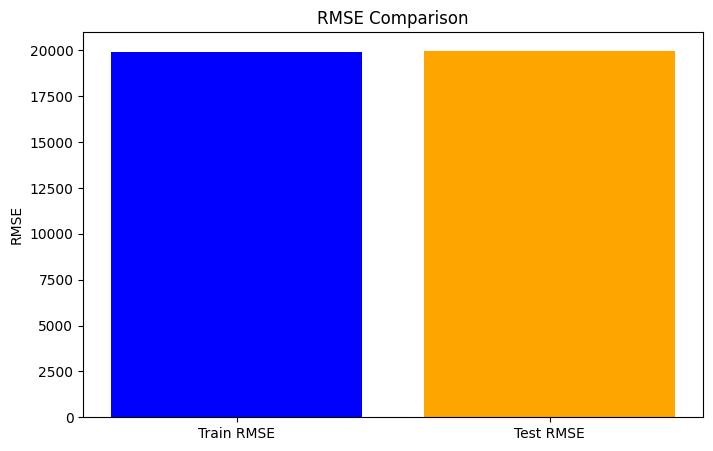

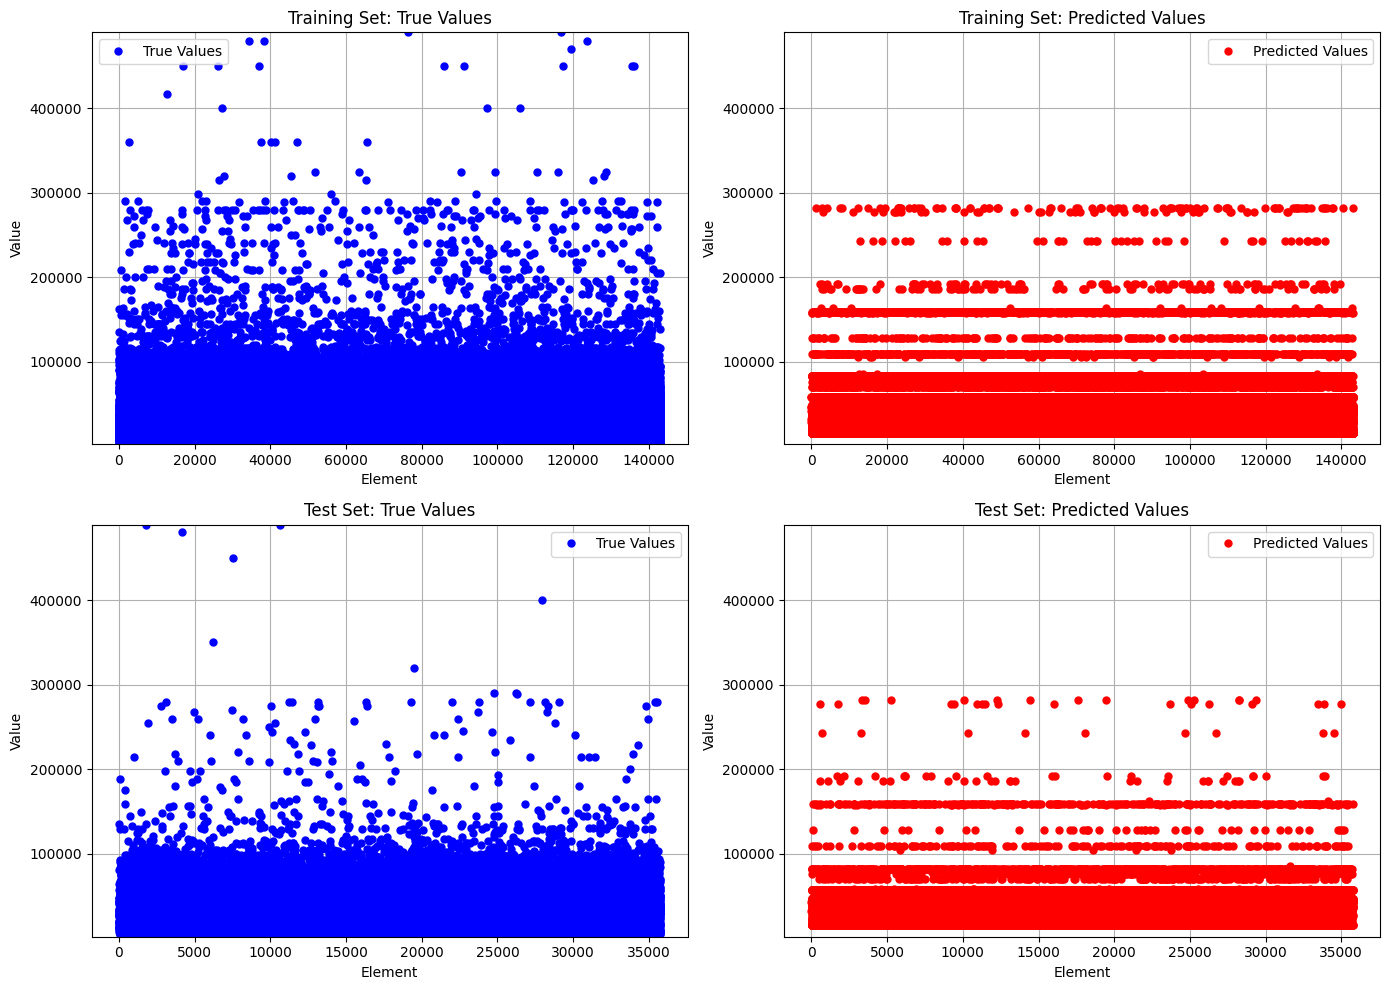

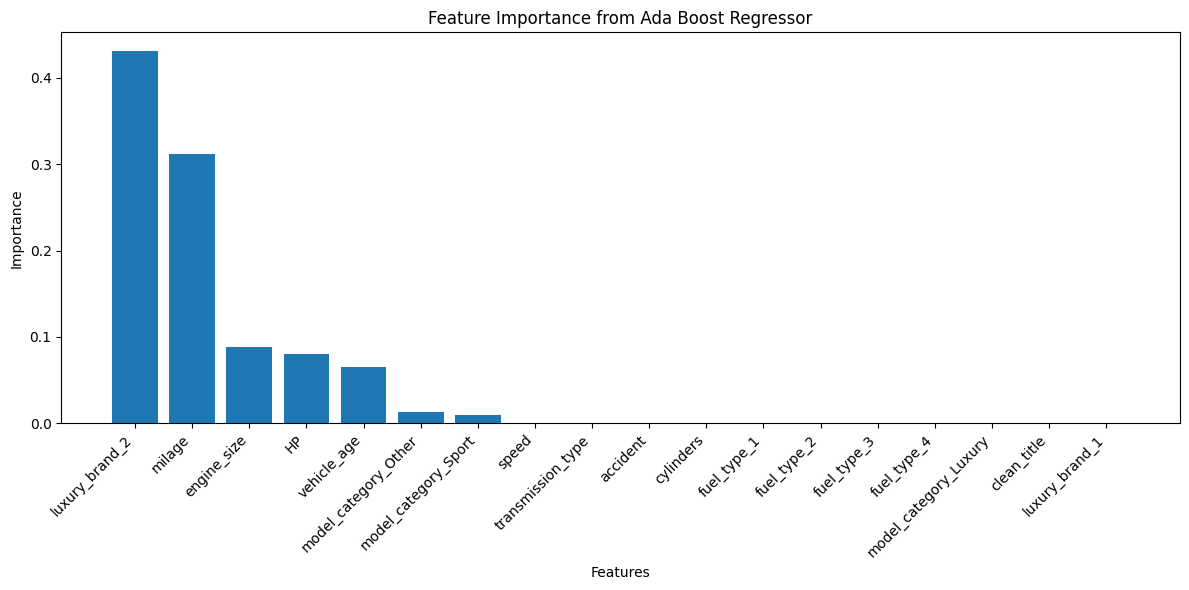

In [45]:
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor(random_state=random_state)

train_evaluate_model(ab, 'Ada Boost Regressor', X_train, X_test, y_train, y_test, results, has_feature_importance=True)

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create MLPRegressor
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Two hidden layers
    activation='relu',
    solver='adam',
    max_iter=2000,  # Increased due to potential convergence needs
    random_state=random_state,
    learning_rate_init=0.001,
    batch_size='auto',
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10  # Number of iterations with no improvement to wait before early stopping
)

# Assuming you have the same train_evaluate_model function
train_evaluate_model(mlp, 'MLP Regressor', X_train, X_test, y_train, y_test, results)

Train rmse 15566.50734314079
Test rmse 17234.297724397817


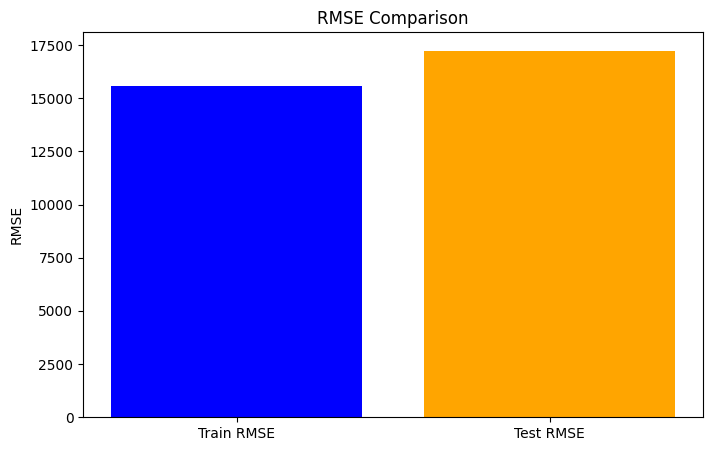

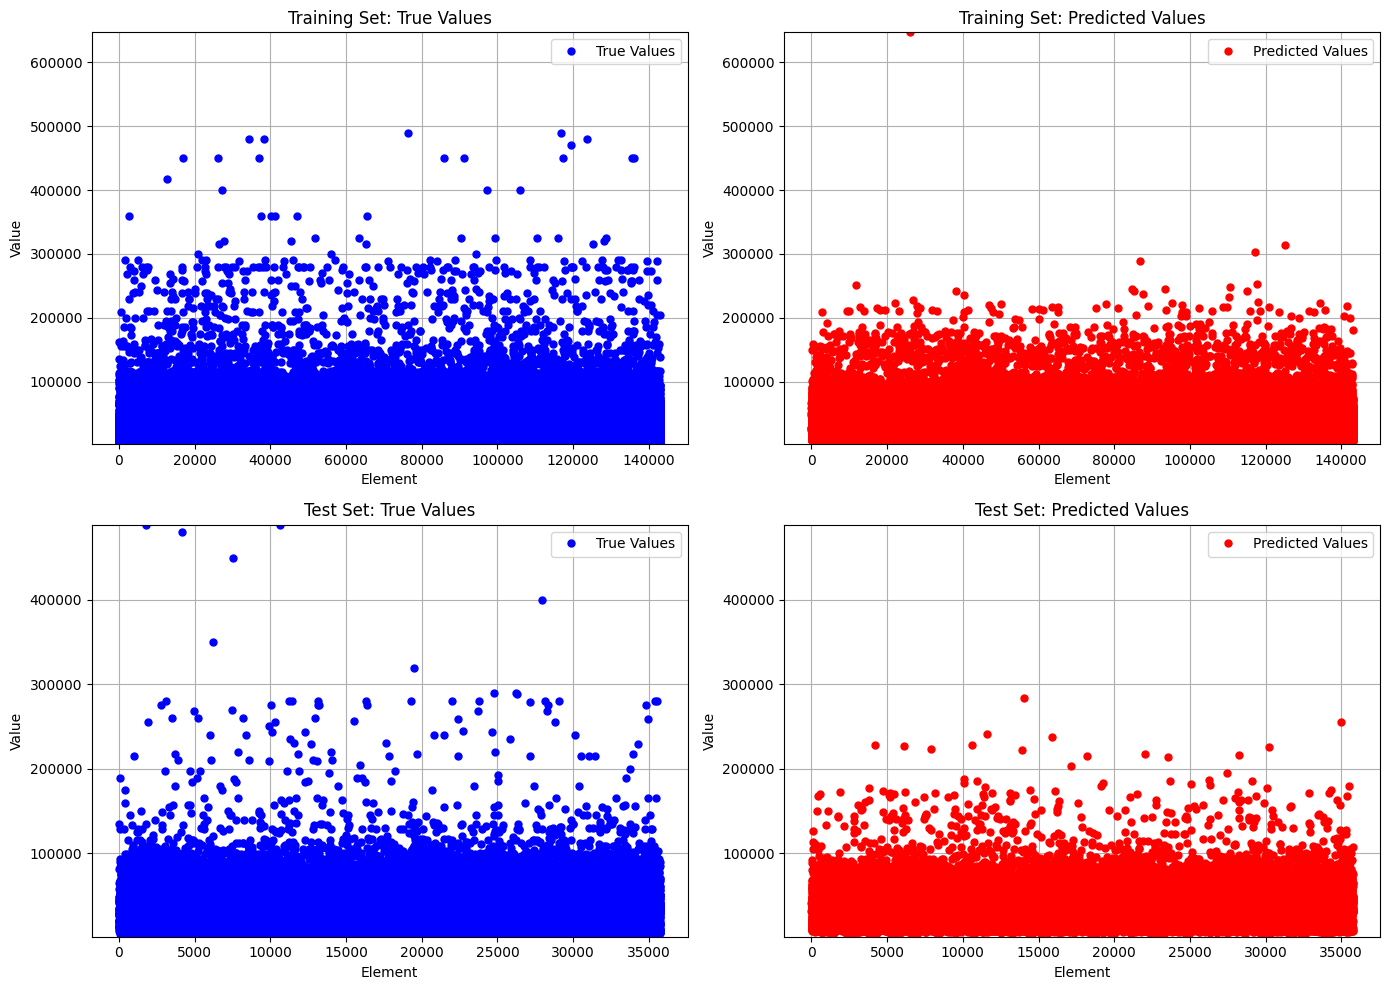

In [175]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(random_state=random_state, 
                    hidden_layer_sizes=(128, 256, 512, 256, 128), 
                    max_iter=500, 
                    learning_rate='adaptive')

train_evaluate_model(mlpr, 'MLP Regressor', X_train, X_test, y_train, y_test, results, has_feature_importance=True)

Train rmse 14916.872671204243
Test rmse 16792.636901027647


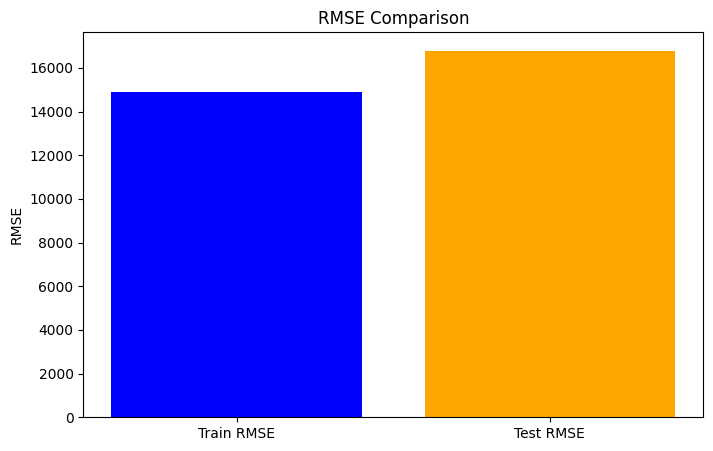

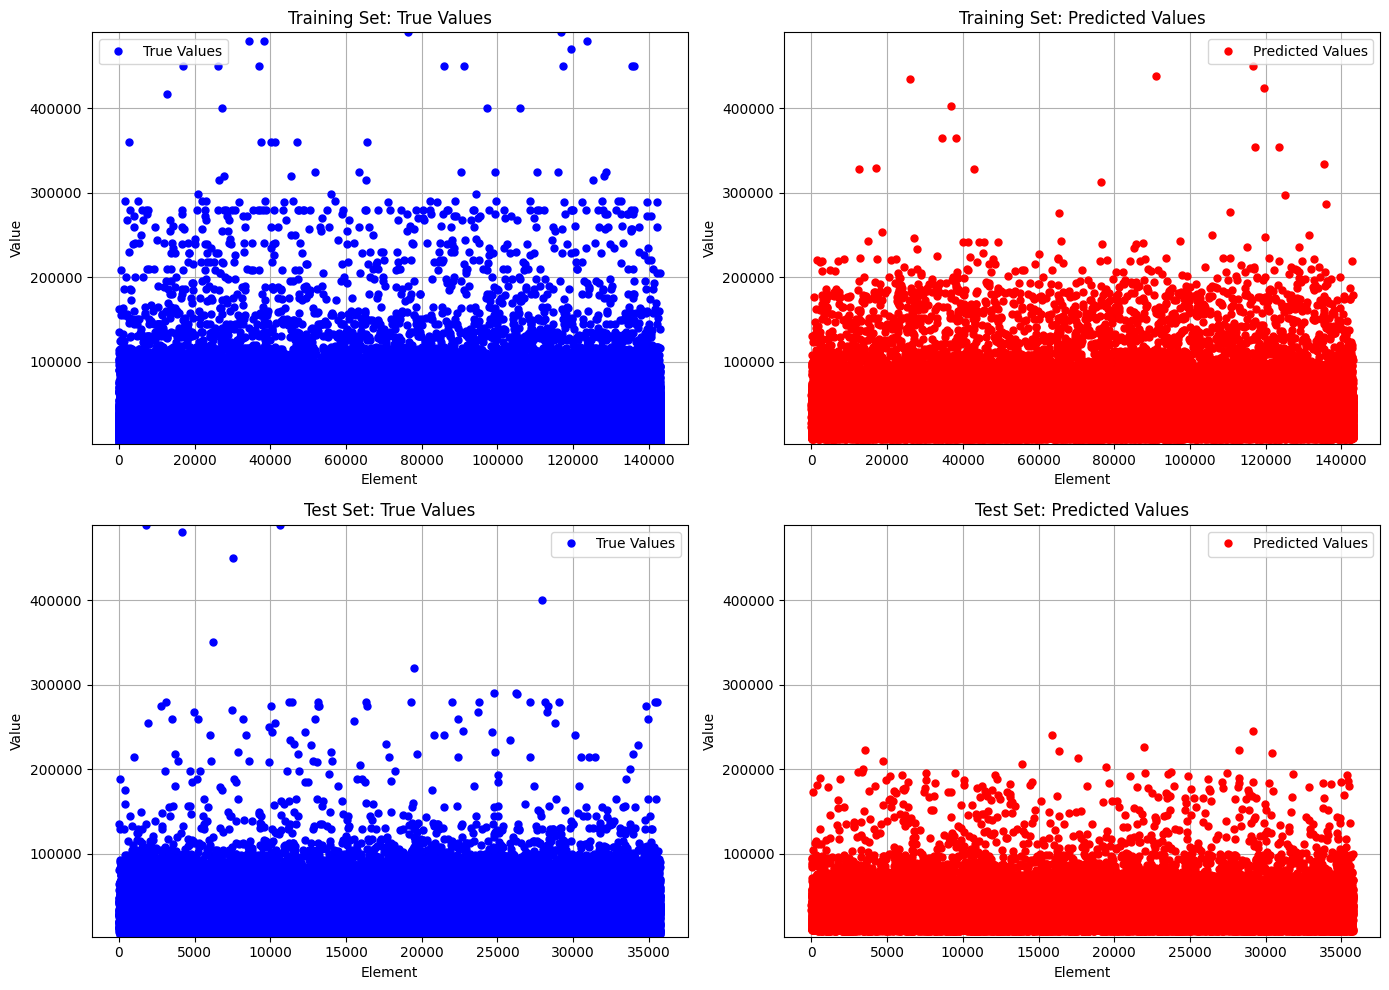

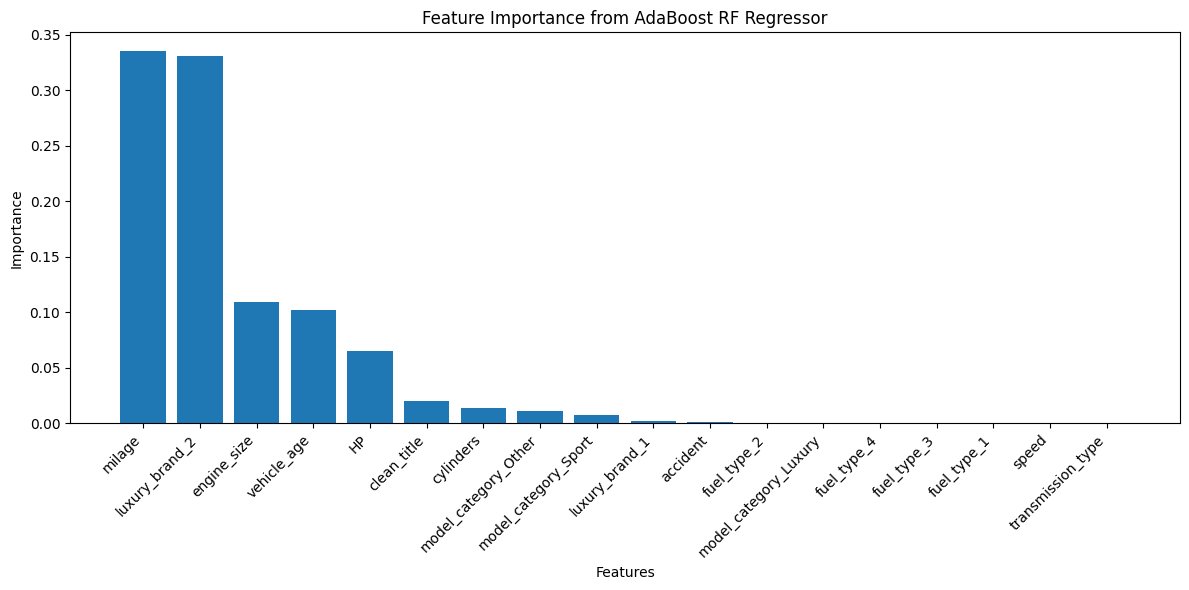

In [46]:
ab = AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=11, min_samples_leaf=4, min_samples_split=10, random_state=random_state), n_estimators=200, random_state=random_state)

train_evaluate_model(ab, 'AdaBoost RF Regressor', X_train, X_test, y_train, y_test, results, has_feature_importance=True)

In [47]:
results.style.format(precision=0)

,Model,Train RMSE,Test RMSE
0,Ridge Regressor,19192,18878
1,Random Forest Regressor,8134,17625
2,Ada Boost Regressor,19941,19990
3,AdaBoost RF Regressor,14917,16793
